# HW 6 - Davis Nyabuti

### Import libraries

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

### Load data into pandas dataframe

In [2]:
data = pd.read_csv('titanic_DM.csv')
print data.head(5)

   Passenger Class   Sex    Age Survived
0          1   3rd  Male  Child       No
1          2   3rd  Male  Child       No
2          3   3rd  Male  Child       No
3          4   3rd  Male  Child       No
4          5   3rd  Male  Child       No


1. Replace male in csv file with Nyabuti and Female with Davis

In [3]:
data.Sex = data.Sex.replace(['Male','male'], 'Nyabuti')
data.Sex = data.Sex.replace(['Female','female'], 'Davis')
print data.head(5)

   Passenger Class      Sex    Age Survived
0          1   3rd  Nyabuti  Child       No
1          2   3rd  Nyabuti  Child       No
2          3   3rd  Nyabuti  Child       No
3          4   3rd  Nyabuti  Child       No
4          5   3rd  Nyabuti  Child       No


Convert target variable to numeric

In [4]:
def encode_target(df, target_column, new_name):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.

    Returns
    -------
    df_mod -- modified DataFrame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod[new_name] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

In [5]:
data2, targets = encode_target(data, "Survived","Target")
data2, Class = encode_target(data2, "Class","Class")
data2, Sex = encode_target(data2, "Sex","Sex")
data2, Age = encode_target(data2, "Age","Age")
data2, targets = encode_target(data2, "Survived","Survived")
print data2.head()
print data2.tail()

   Passenger  Class  Sex  Age  Survived  Target
0          1      0    0    0         0       0
1          2      0    0    0         0       0
2          3      0    0    0         0       0
3          4      0    0    0         0       0
4          5      0    0    0         0       0
      Passenger  Class  Sex  Age  Survived  Target
2196       2197      3    1    1         1       1
2197       2198      3    1    1         1       1
2198       2199      3    1    1         1       1
2199       2200      3    1    1         1       1
2200       2201      3    1    1         1       1


In [6]:
features = list(data2.columns[:4])

print features

['Passenger', 'Class', 'Sex', 'Age']


Generate features

3. Produce a decision tree

In [7]:
clf = tree.DecisionTreeClassifier()
target = data2["Target"]
attr = data2[features]
clf.fit(attr, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

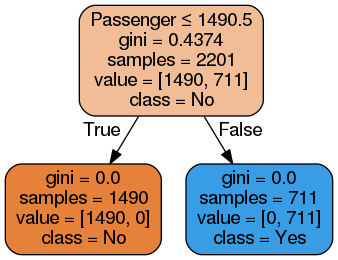

In [8]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features,  
                         class_names=targets,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  